In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.colors as colors
import plotly.graph_objects as go
pio.default_templates="plotly_white"

In [2]:
data =pd.read_csv(r'E:\Projects\Python\Ecommerce\Superstore.csv',encoding='unicode_escape')

In [3]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


data.info()

#### Converting Order Date and Ship Date columns from object to Date time data type

In [25]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

### Creating New columns Order Day,Order Year and Order Year Of Week

In [43]:
data['Order Month'] =data['Order Date'].dt.month
data['Order Year'] =data['Order Date'].dt.year
data['Order Day of week'] =data['Order Date'].dt.dayofweek

## 1. Identify Monthly sales of the store and which month has recorded the highest and lowest sales?

In [49]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Day',
       'Order Month', 'Order Year', 'Order Day of week'],
      dtype='object')

In [55]:
sales_per_month = data.groupby('Order Month')['Sales'].sum().reset_index()
sales_per_month

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


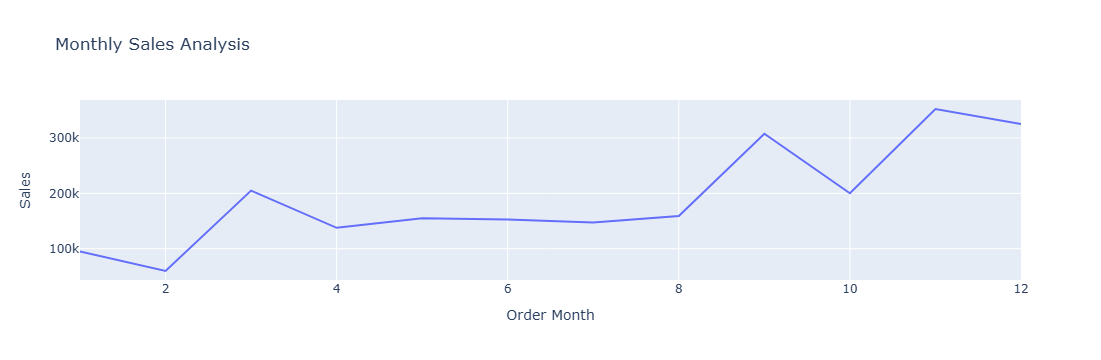

In [60]:
px.line(sales_per_month,x='Order Month',y='Sales',title='Monthly Sales Analysis')


#### November Month has recorded the highest sales
#### February Month has recorded the lowest sales

## 2.Analyze sales based on the  produt categories and determine which category has the lowest sales and lowest sales?

In [74]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Day',
       'Order Month', 'Order Year', 'Order Day of week'],
      dtype='object')

In [110]:
sales_category = data.groupby('Category')['Sales'].sum().reset_index()
sales_category 

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


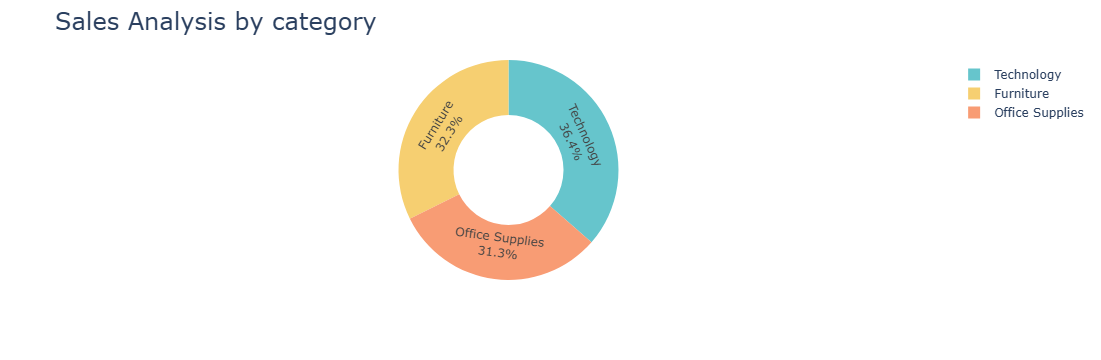

In [116]:
fig =px.pie(sales_category,
            values='Sales',
            names ='Category',
            hole=0.5,
           color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by category',title_font=dict(size=24))
fig.show()

#### Technology has the highest contributor of sales
#### Office supplies has the lowest contribution of sales

## 3.Analyze sales based on the  produt subcategories and determine which subcategory has the lowest sales and lowest sales?

In [124]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Day',
       'Order Month', 'Order Year', 'Order Day of week'],
      dtype='object')

In [137]:
sales_Sub_category = data.groupby('Sub-Category',as_index=False)['Sales'].sum()
sales_Sub_category 

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


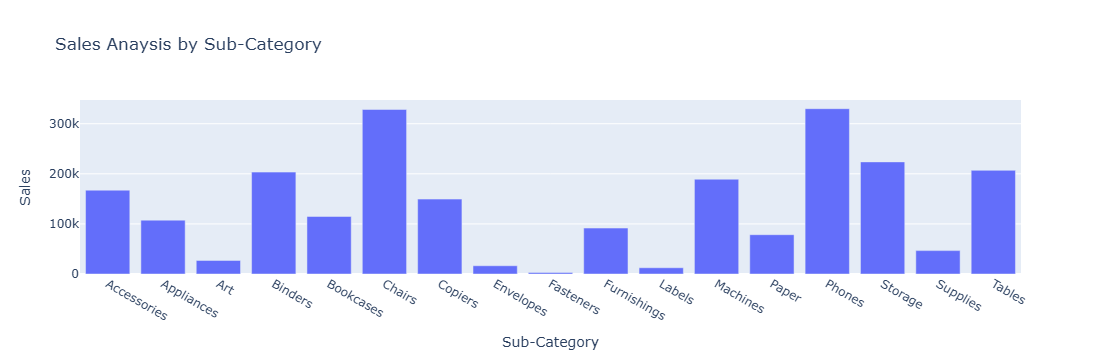

In [141]:
px.bar(sales_Sub_category,x='Sub-Category',y='Sales',title ='Sales Anaysis by Sub-Category')

#### Phones has the highest contribution of sales under sub-category
#### Fasteners has the lowest contribution of sales under sub-category

## 4.Analyze profit and determine which month has the highest profit and lowest profit?

In [153]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Day',
       'Order Month', 'Order Year', 'Order Day of week'],
      dtype='object')

In [161]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
profit_by_month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


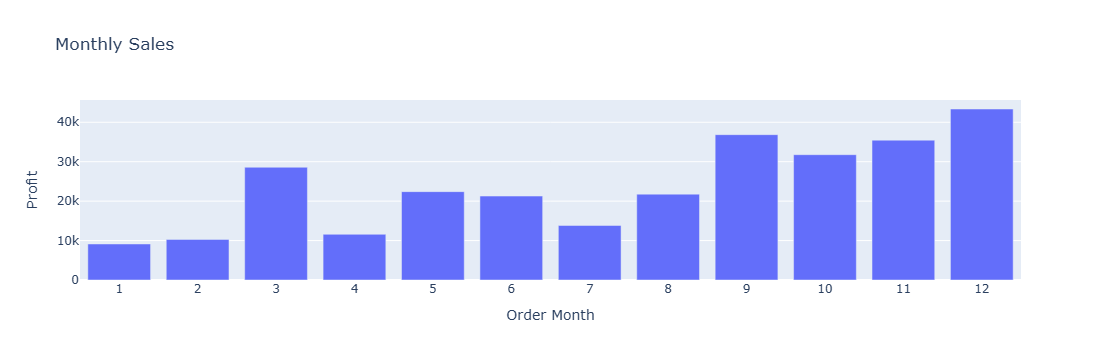

In [218]:
fig = px.bar(profit_by_month , x='Order Month', y='Profit', title='Monthly Sales')
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=profit_by_month['Order Month'],
        ticktext=profit_by_month['Order Month'],
            )
)
fig.show()


#### December Month has the highest profit
#### January Month has the lowest profit

## 5.Analyze the profit by category and sub_category?


In [182]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Day',
       'Order Month', 'Order Year', 'Order Day of week'],
      dtype='object')

In [188]:
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


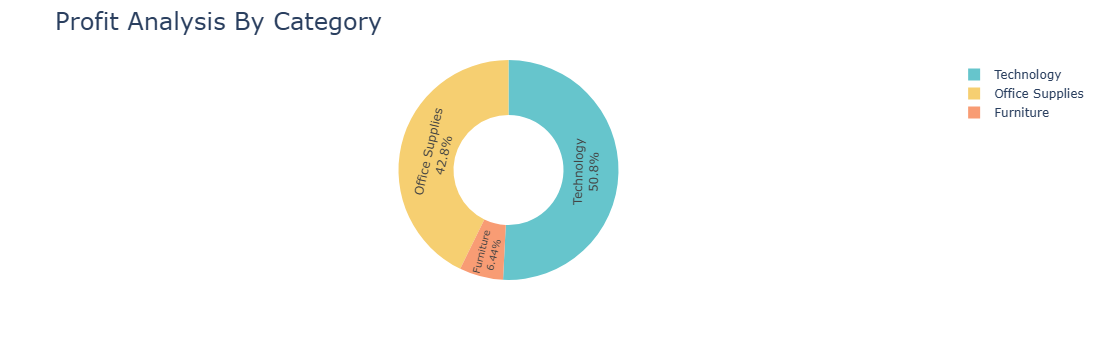

In [208]:
fig = px.pie(profit_by_category,values='Profit',names='Category',hole=0.5,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition ='inside',textinfo='label+percent')
fig.update_layout(title_text = 'Profit Analysis By Category',title_font =dict(size=24))
fig.show()




#### Technology has the highest profit
#### Furniture has the lowest profit

In [224]:
profit_sub_category = data.groupby('Sub-Category',as_index=False)['Profit'].sum()
profit_sub_category 

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


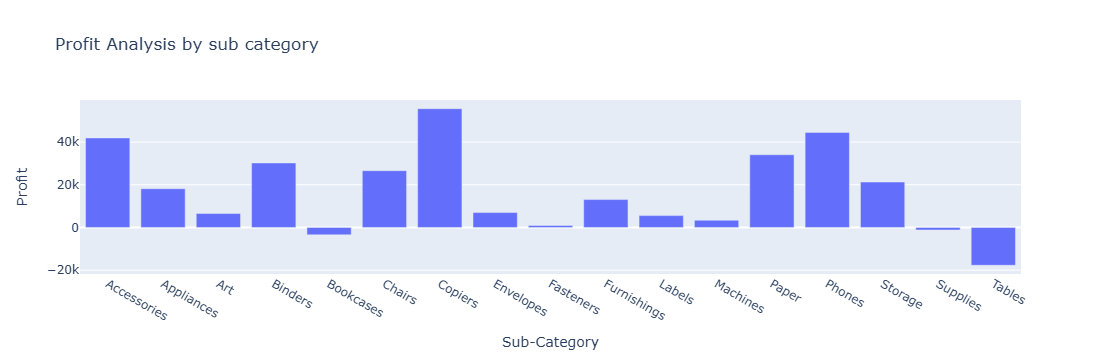

In [230]:
px.bar(profit_sub_category,x='Sub-Category',y='Profit',title ='Profit Analysis by sub category')

#### Copiers has the highest profit under sub_category.
#### Tables has the lowest profit under sub_category.

## 6.Analyze the sales and profit by customer segment?

In [220]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Day',
       'Order Month', 'Order Year', 'Order Day of week'],
      dtype='object')

In [242]:
profit_Segment = data.groupby('Segment')['Profit'].sum().reset_index()
profit_Segment

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


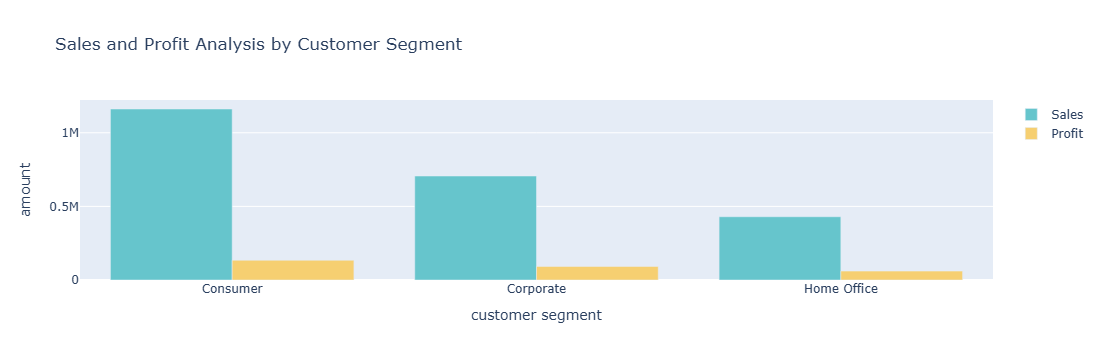

In [278]:
Sales_profit_by_Segment = data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
color_palette = colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x=Sales_profit_by_Segment['Segment'],
                     y=Sales_profit_by_Segment['Sales'],
                     name ='Sales',
                     marker_color =color_palette[0]))
fig.add_trace(go.Bar(x=Sales_profit_by_Segment['Segment'],
                     y=Sales_profit_by_Segment['Profit'],
                     name ='Profit',
                     marker_color =color_palette[1]))
fig.update_layout(title ='Sales and Profit Analysis by Customer Segment',
                  xaxis_title ='customer segment',
                  yaxis_title ='amount')
fig.show()
                     

#### consumer segement has the highest Profit and sales
#### Home Office has the lowest profit and sales